# Libraries

In [59]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style('darkgrid')

# Others
import openpyxl
import xlrd
import os
import io
import warnings
import statistics

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import (calculate_bartlett_sphericity,
                                             calculate_kmo,
                                             chi2)

In [60]:
# Metrics from Sklearn
from sklearn import metrics
from sklearn import set_config
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models Regression from Sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [61]:
# Regression
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [62]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

In [63]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
set_config(display="text")  # displays text representation of estimators
plt.rcParams["figure.figsize"] = [7.2, 4.8]

# Input Dataset for Model

In [64]:
# Dados dos empregados com vinculo ativo em 31/12 apenas da industria da transformação do ano de 2021
df_ind_trans = pd.read_csv(r"DF_Industria_tranformacao_2021.csv", sep=";", encoding='UTF-8', low_memory=False)
df_ind_trans.shape

(1146857, 24)

In [65]:
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_2.0_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046


In [66]:
df_ind_trans = df_ind_trans.rename(columns={'Escolaridade_após_2005': 'Escolaridade', 'CNAE_2.0_Subclasse_targetencoder_': 'CNAE_Subclasse_targetencoder_'})

# Split Dataset into Train and Test

In [67]:
df_model = df_ind_trans.sample(frac = 0.5)
df_model.shape

(573428, 24)

In [68]:
df_seleted = df_model[['id']]
df_seleted['Select'] = 1
df_seleted.shape

C:\Users\luand\AppData\Local\Temp\ipykernel_22276\3788505534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleted['Select'] = 1


(573428, 2)

In [69]:
df_ind_trans = df_ind_trans.merge(df_seleted, on=['id'], how='left')
df_ind_trans['Select'] = df_ind_trans['Select'].fillna(0)
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_,Select
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986,0.000
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,1.000
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877,0.000
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046,0.000


In [70]:
df_ind_trans['Select'].value_counts()

Select
0.000    573429
1.000    573428
Name: count, dtype: int64

# Checking the balance of the dataset

In [71]:
lst_features = df_ind_trans.columns.tolist()
lst_features.remove('id')
lst_features.remove('Select')
lst_features

['Faixa_Etária',
 'Faixa_Hora_Contrat',
 'Faixa_Tempo_Emprego',
 'Escolaridade',
 'Qtd_Hora_Contr',
 'Idade',
 'Ind_Simples',
 'Ind_Portador_Defic',
 'Qtd_Dias_Afastamento',
 'Raça_Cor',
 'Vl_Remun_Dezembro_Nom',
 'Sexo_Trabalhador',
 'Tamanho_Estabelecimento',
 'Tempo_Emprego',
 'Tipo_Admissão',
 'Tipo_Defic',
 'Ind_Trab_Intermitente',
 'Ind_Trab_Parcial',
 'CNAE_Subclasse_targetencoder_',
 'Tipo_Vínculo_targetencoder_',
 'IBGE_Subsetor_targetencoder_',
 'CBO_targetencoder_',
 'cidades_targetencoder_']

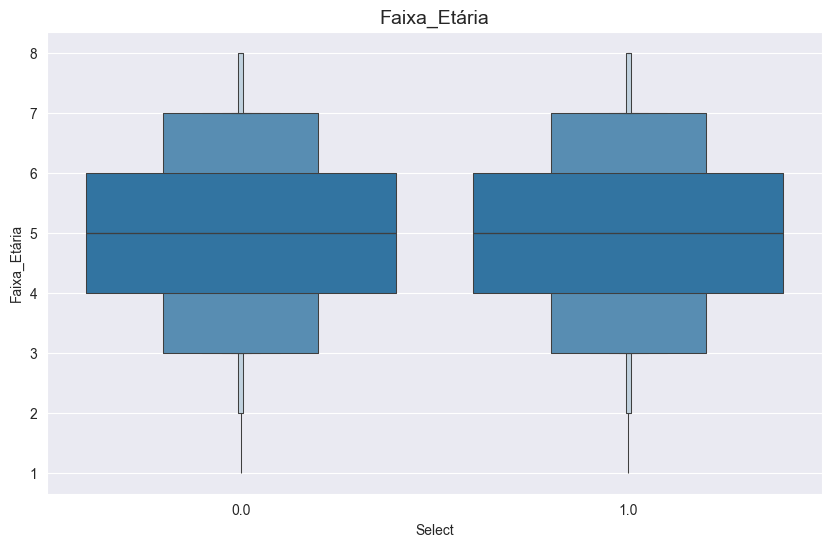

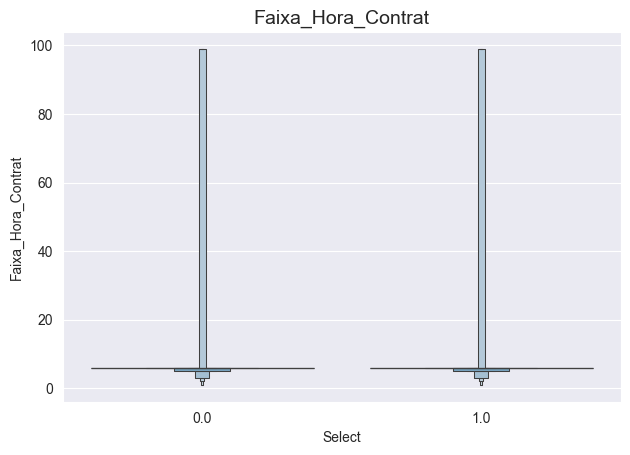

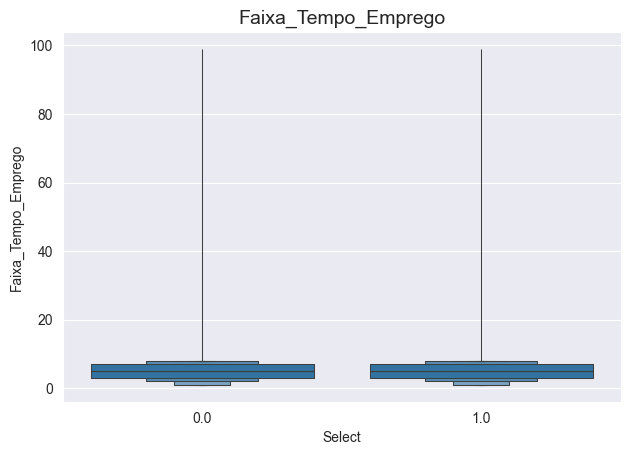

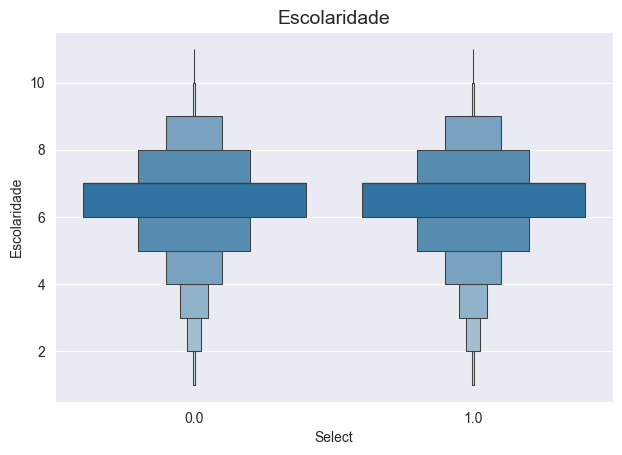

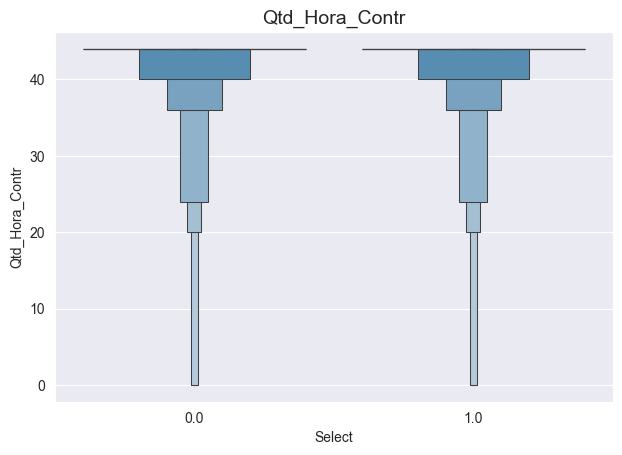

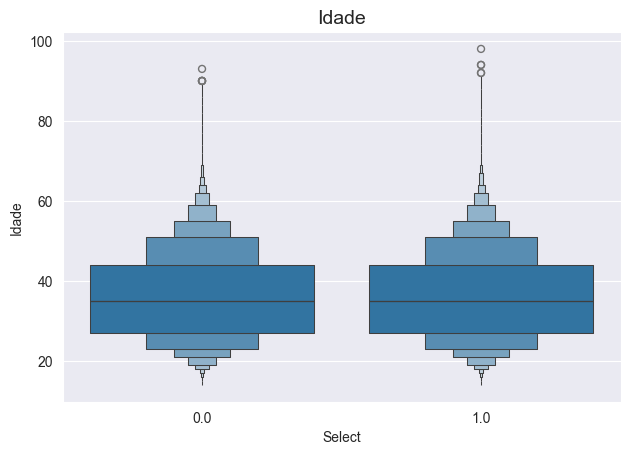

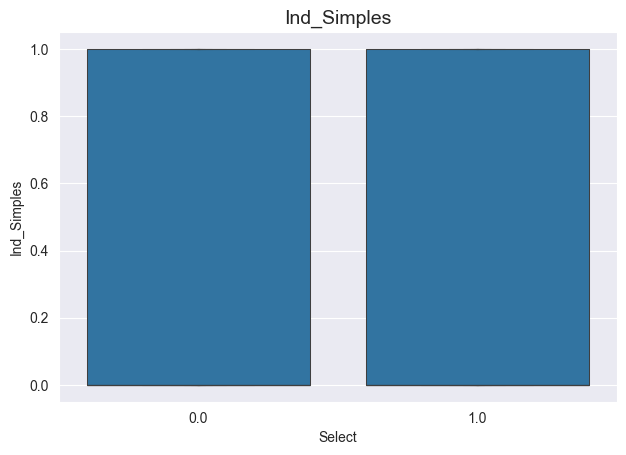

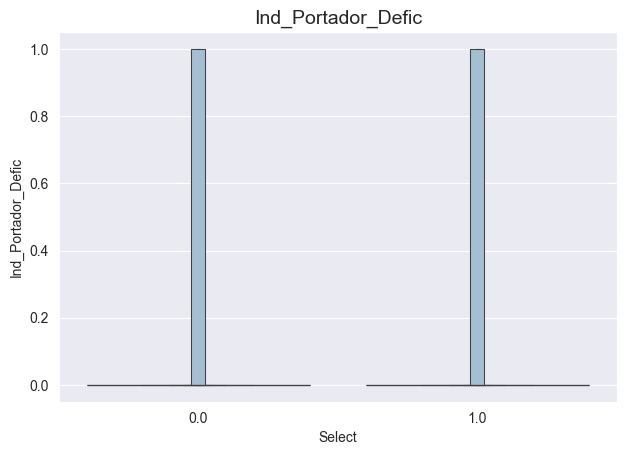

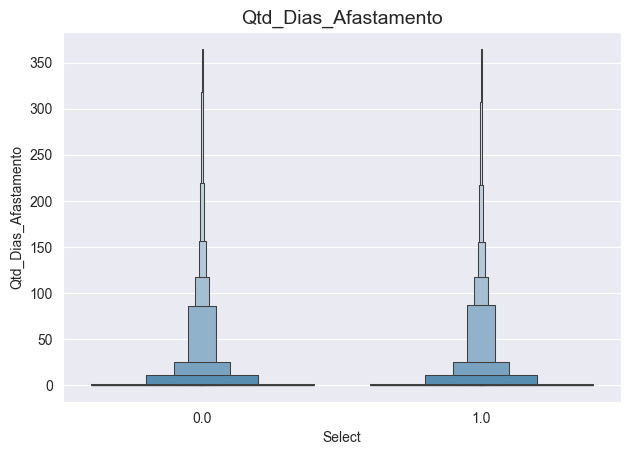

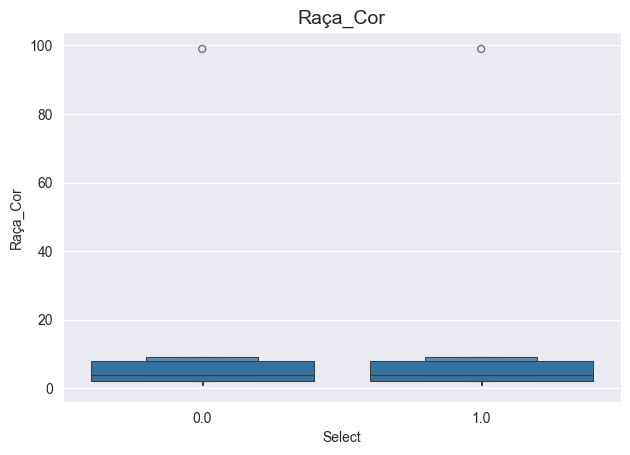

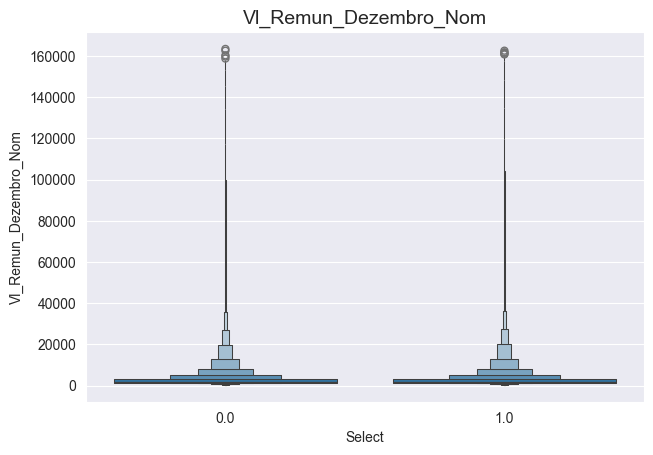

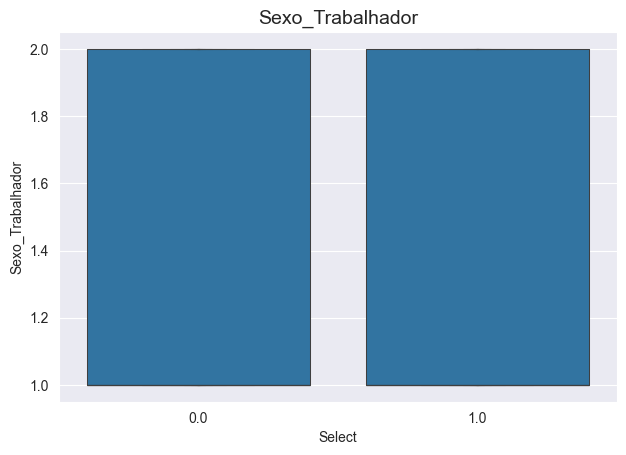

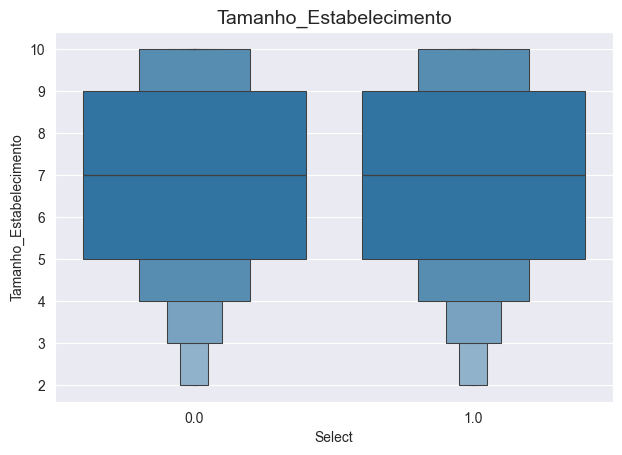

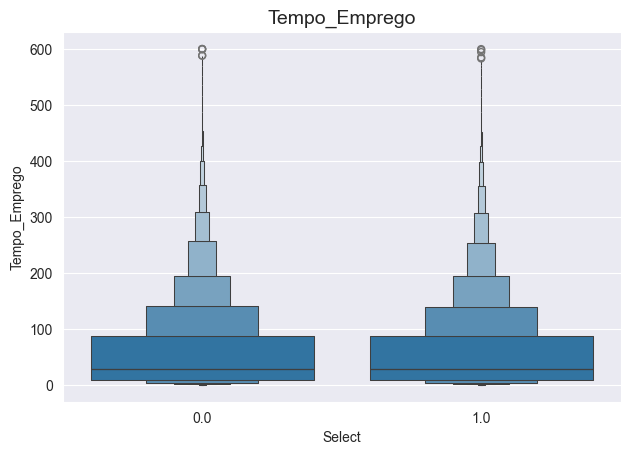

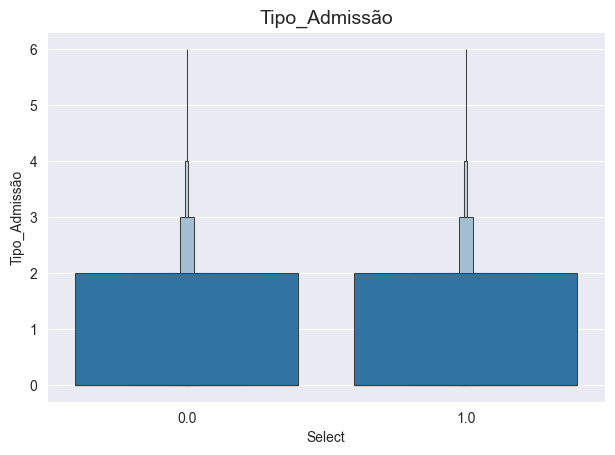

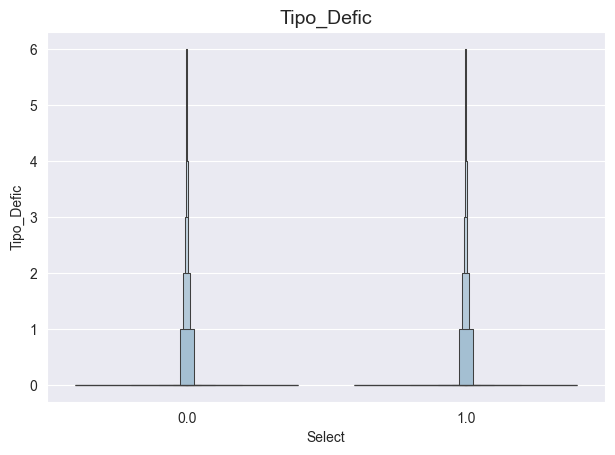

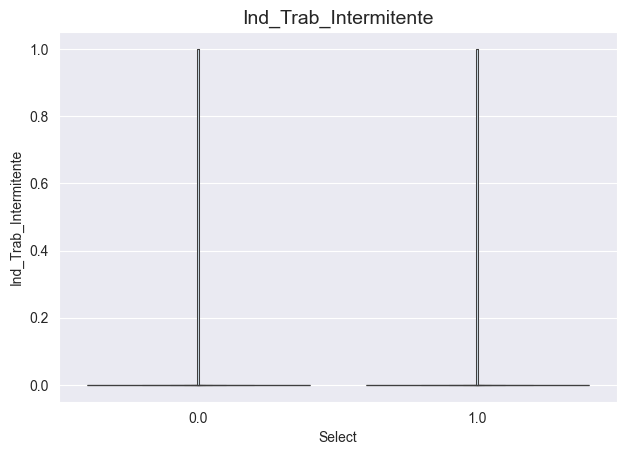

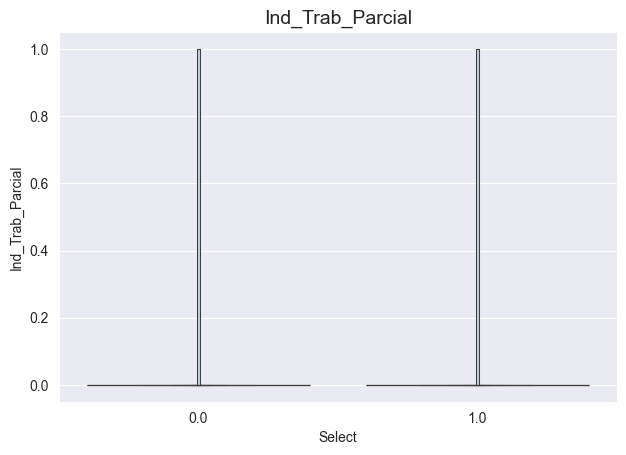

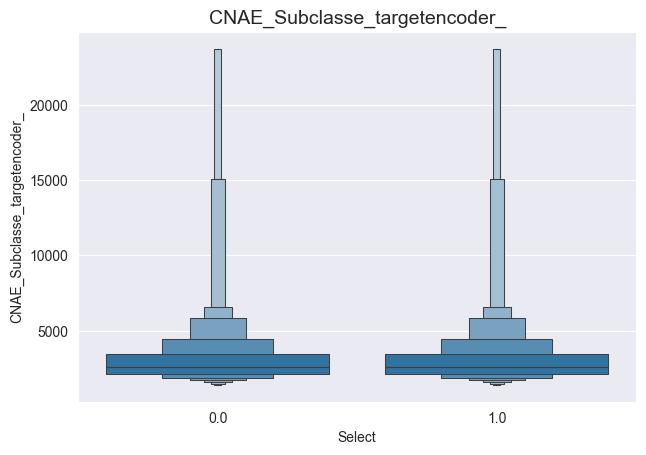

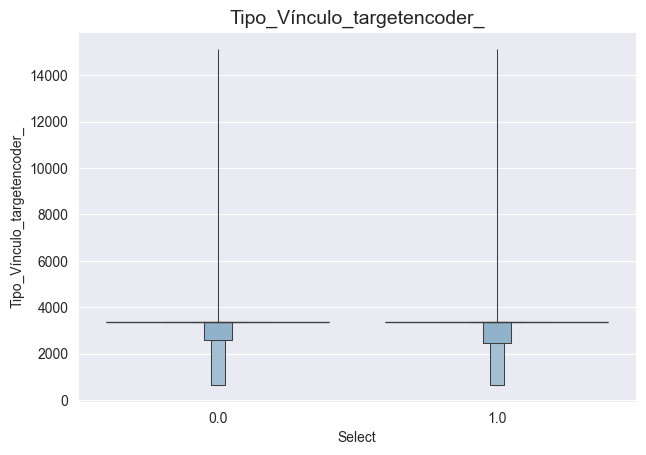

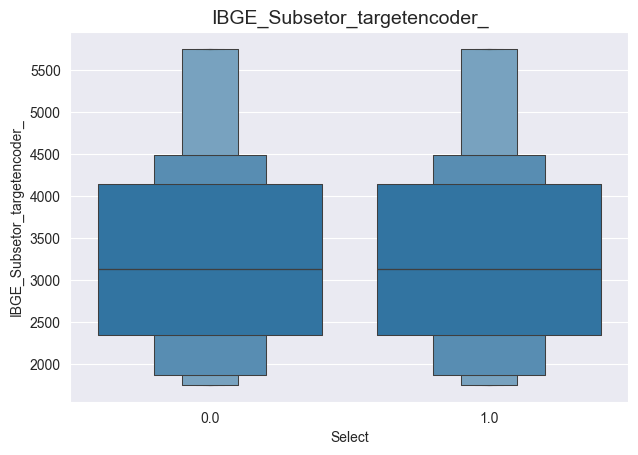

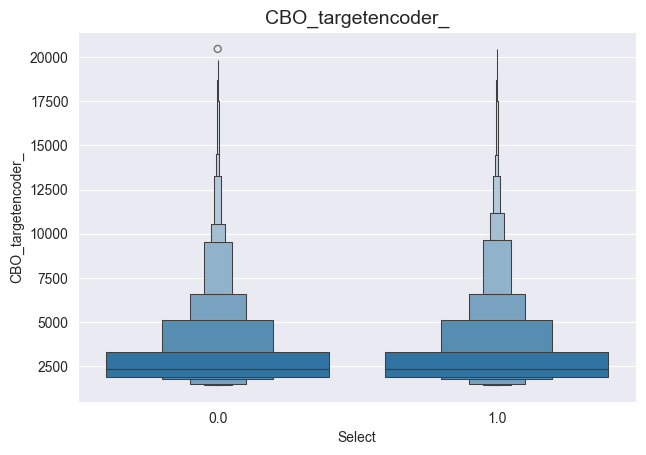

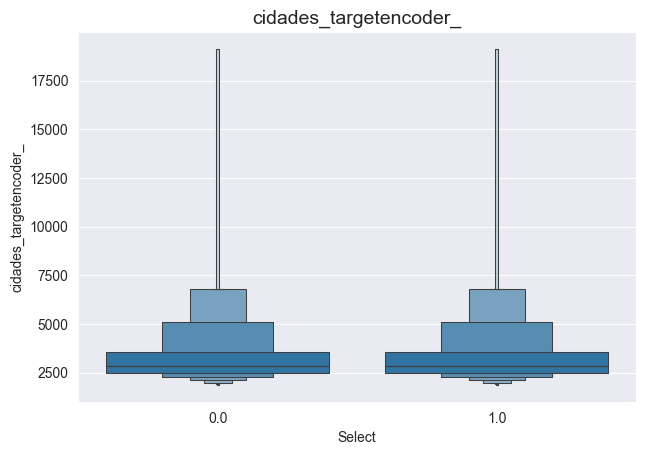

In [72]:
plt.figure(figsize=(10, 6))

for Names in lst_features: 
    ax = sns.boxenplot(data=df_ind_trans, x='Select', y=Names)
    ax.set_title(Names, fontdict={'fontsize': 14})
    plt.show()

In [73]:
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_,Select
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986,0.000
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,1.000
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877,0.000
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046,0.000


# Making Dataset de Train and Test

In [74]:
df_train = df_ind_trans[(df_ind_trans['Select'] == 1)]
df_test = df_ind_trans[(df_ind_trans['Select'] == 0)]
df_train.shape, df_test.shape

((573428, 25), (573429, 25))

In [75]:
df_train = df_train.drop(columns=['Select'])
df_test = df_test.drop(columns=['Select'])
df_train = df_train.set_index(['id'])
df_test = df_test.set_index(['id'])
df_train.shape, df_test.shape

((573428, 23), (573429, 23))

# View of Correlation

<Axes: >

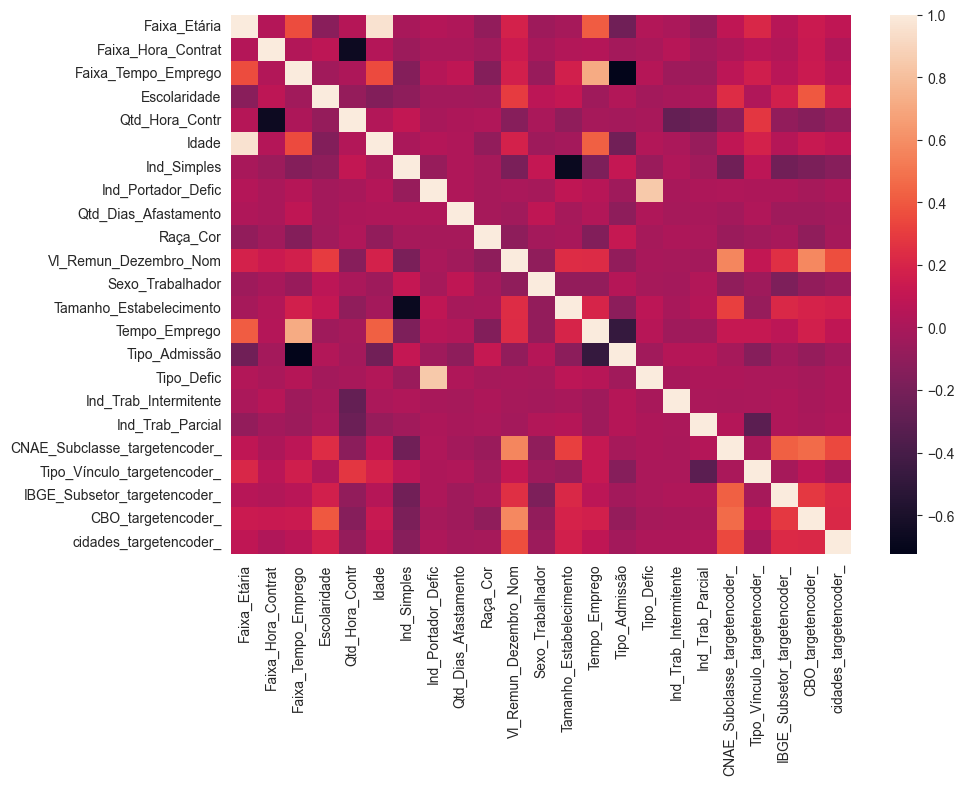

In [76]:
#plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.figsize"] = [10, 7]
cormat = df_train.corr()
#sns.heatmap(cormat, annot=True)
sns.heatmap(cormat)

# Factor Analyzer

In [77]:
lst_CORR = df_train.columns.tolist()
lst_CORR.remove('Vl_Remun_Dezembro_Nom')
df_train_CORR = df_train[lst_CORR]

In [78]:
df_train_CORR.head()

,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
id,,,,,,,,,,,,,,,,,,,,,,
2,8,5,6,1,36,68,0,0,62,8,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
5,5,6,3,1,44,34,1,0,0,2,1,3,11.900,1,0,0,0,1465.407,3363.495,2353.383,1583.565,2294.946
6,6,6,4,1,44,49,1,0,0,8,1,2,18.900,0,0,0,0,2572.767,3363.495,2353.383,1795.755,2880.169
8,7,5,5,1,39,64,1,0,0,9,1,5,25.900,0,0,0,0,2885.720,3363.495,3863.913,2685.251,3514.783
13,3,6,3,1,44,18,1,0,0,2,1,5,6.800,1,0,0,0,2034.086,3363.495,2012.400,2246.242,2489.210


In [79]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_train_CORR)
chi_square_value, p_value

(4896616.055996491, 0.0)

In [80]:
kmo_model = calculate_kmo(df_train_CORR)
kmo_model

(array([0.60336297, 0.3913101 , 0.67456435, 0.68716132, 0.44586881,
        0.59712194, 0.63681679, 0.50942241, 0.71234435, 0.88042871,
        0.6585321 , 0.64295303, 0.78249174, 0.70682616, 0.50785723,
        0.27175431, 0.56988159, 0.73173915, 0.51930548, 0.8067278 ,
        0.74864361, 0.84053157]),
 0.6150827782517149)

In [81]:
pca_ = PCA(n_components=2)
X_train_pca = pca_.fit_transform(df_train_CORR)
exp_var_pca = pca_.explained_variance_ratio_
D_PF_ = pd.DataFrame(exp_var_pca)
D_PF_.columns = ['variance explained']
E_PF_ = pd.DataFrame(np.cumsum(exp_var_pca))
E_PF_.columns = ['variance explained acum']
F_PF_ = pd.concat([D_PF_, E_PF_], axis=1)
F_PF_

,variance explained,variance explained acum
0,0.597,0.597
1,0.183,0.780


# Separating the variables - first part

In [82]:
X = df_train.drop(columns='Vl_Remun_Dezembro_Nom')
y = df_train['Vl_Remun_Dezembro_Nom']
X.shape, y.shape

((573428, 22), (573428,))

# Training the GLM

## Version 1

In [83]:
mod_1 = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
res_1 = mod_1.fit()
display(res_1.summary())
# For the first question, you should look at the (P>|z|) column. If the absolute p-value is smaller than 0.05,
# it means that the feature affects Churn in a statistically significant way.

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                   
=================================================================================
Dep. Variable:     Vl_Remun_Dezembro_Nom   No. Observations:               573428
Model:                               GLM   Df Residuals:                   573406
Model Family:                    Poisson   Df Model:                           21
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -3.2142e+08
Date:                   Fri, 21 Jun 2024   Deviance:                   6.3734e+08
Time:                           21:47:27   Pearson chi2:                 9.95e+08
No. Iterations:                       14   Pseudo R-squ. (CS):              1.000
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Faixa_Etária                      0.2107   6.53e-05   3229.123      0.000       0.211       0.211
Faixa_Hora_Contrat                0.0427   2.92e-06   1.46e+04      0.000       0.043       0.043
Faixa_Tempo_Emprego               0.0227   7.73e-06   2939.854      0.000       0.023       0.023
Escolaridade                      0.1743   1.92e-05   9065.845      0.000       0.174       0.174
Qtd_Hora_Contr                    0.0862   5.05e-06   1.71e+04      0.000       0.086       0.086
Idade                            -0.0055   7.18e-06   -768.654      0.000      -0.006      -0.006
Ind_Simples                      -0.0145   8.54e-05   -170.157      0.000      -0.015      -0.014
Ind_Portador_Defic               -0.1153      0.000   -348.260      0.000      -0.116      -0.115
Qtd_Dias_Afastamento             -0.0007    8.7e-07   -752.929      0.000      -0.001      -0.001
Raça_Cor                         -0.0046   7.84e-06   -587.116      0.000      -0.005      -0.005
Sexo_Trabalhador                 -0.1221   5.56e-05  -2195.484      0.000      -0.122      -0.122
Tamanho_Estabelecimento           0.0787   1.42e-05   5531.886      0.000       0.079       0.079
Tempo_Emprego                     0.0011   3.14e-07   3535.677      0.000       0.001       0.001
Tipo_Admissão                     0.0230   2.92e-05    788.310      0.000       0.023       0.023
Tipo_Defic                       -0.0144      0.000   -116.680      0.000      -0.015      -0.014
Ind_Trab_Intermitente             0.5398      0.000   1086.107      0.000       0.539       0.541
Ind_Trab_Parcial                  0.9126      0.000   2197.288      0.000       0.912       0.913
CNAE_Subclasse_targetencoder_  3.714e-05   5.95e-09   6238.882      0.000    3.71e-05    3.72e-05
Tipo_Vínculo_targetencoder_       0.0001   2.88e-08   3692.202      0.000       0.000       0.000
IBGE_Subsetor_targetencoder_   6.079e-05   2.13e-08   2852.357      0.000    6.08e-05    6.08e-05
CBO_targetencoder_             8.055e-05    8.4e-09   9585.833      0.000    8.05e-05    8.06e-05
cidades_targetencoder_         9.886e-05   8.76e-09   1.13e+04      0.000    9.88e-05    9.89e-05
=================================================================================================
"""

In [84]:
np.exp(res_1.params)

Faixa_Etária                    1.235
Faixa_Hora_Contrat              1.044
Faixa_Tempo_Emprego             1.023
Escolaridade                    1.190
Qtd_Hora_Contr                  1.090
Idade                           0.994
Ind_Simples                     0.986
Ind_Portador_Defic              0.891
Qtd_Dias_Afastamento            0.999
Raça_Cor                        0.995
Sexo_Trabalhador                0.885
Tamanho_Estabelecimento         1.082
Tempo_Emprego                   1.001
Tipo_Admissão                   1.023
Tipo_Defic                      0.986
Ind_Trab_Intermitente           1.716
Ind_Trab_Parcial                2.491
CNAE_Subclasse_targetencoder_   1.000
Tipo_Vínculo_targetencoder_     1.000
IBGE_Subsetor_targetencoder_    1.000
CBO_targetencoder_              1.000
cidades_targetencoder_          1.000
dtype: float64

In [85]:
random_ = 2023
X_train_res_1, X_test_res_1, y_train_res_1, y_test_res_1 = train_test_split(X , y, test_size=0.2, random_state=random_)
X_train_res_1.shape, X_test_res_1.shape, y_train_res_1.shape, y_test_res_1.shape

((458742, 22), (114686, 22), (458742,), (114686,))

In [86]:
y_pred_res_1= res_1.predict(X_test_res_1) 

In [87]:
res_1_diff = pd.DataFrame({'Actual value': y_test_res_1, 'Predicted value': y_pred_res_1})
res_1_diff.head(10)

,Actual value,Predicted value
id,,
758216,544.910,187.873
31053,2108.090,1811.600
1031803,3310.510,4371.033
694198,1478.330,1443.215
1138385,1228.460,1751.227
771577,4555.520,3769.917
191427,1466.670,2406.306
188716,2816.330,2358.931
901413,1550.000,1622.847


In [88]:
res_1_diff.describe()

,Actual value,Predicted value
count,114686.000,114686.000
mean,3323.609,3281.804
std,5308.898,4582.335
min,330.000,10.877
25%,1440.173,1490.610
50%,1989.425,2208.071
75%,3181.217,3487.063
max,158351.050,202932.446


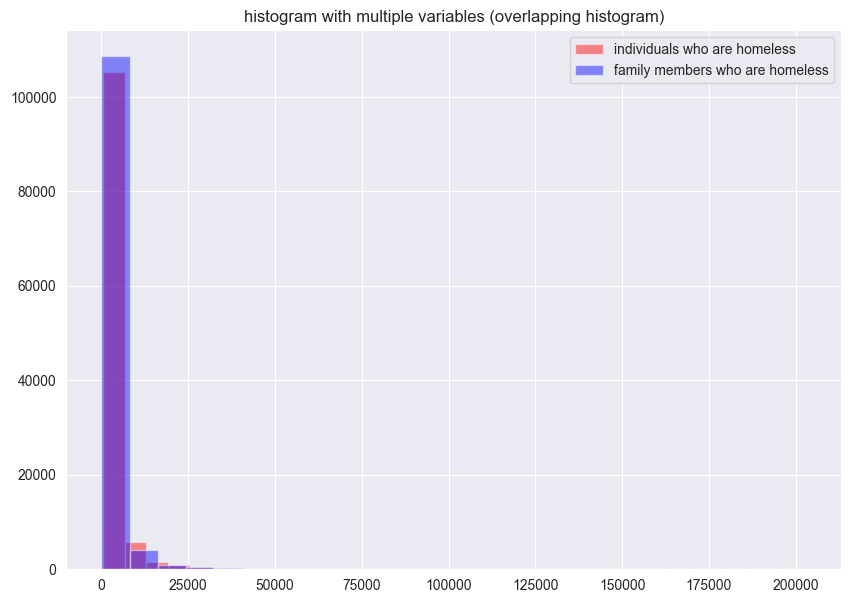

In [89]:
# plotting two histograms on the same axis 
plt.hist(res_1_diff['Actual value'], bins=25, alpha=0.45, color='red') 
plt.hist(res_1_diff['Predicted value'], bins=25, alpha=0.45, color='blue') 
plt.title("histogram with multiple variables (overlapping histogram)") 
plt.legend(['individuals who are homeless',  'family members who are homeless']) 
plt.show() 

In [90]:
mae_res_1 = metrics.mean_absolute_error(y_test_res_1, y_pred_res_1)
mse_res_1 = metrics.mean_squared_error(y_test_res_1, y_pred_res_1)
r2_res_1 = np.sqrt(metrics.mean_squared_error(y_test_res_1, y_pred_res_1))

print('Mean Absolute Error:', mae_res_1)
print('Mean Square Error:', mse_res_1)
print('Root Mean Square Error:', r2_res_1)

Mean Absolute Error: 1410.2391406941451
Mean Square Error: 13589467.215662552
Root Mean Square Error: 3686.389455234288


## Version 2

In [91]:
mod_2 = sm.OLS(y, X)    # Describe model
res_2 = mod_2.fit()       # Fit model
print(res_2.summary())   # Summarize model

                                  OLS Regression Results                                  
Dep. Variable:     Vl_Remun_Dezembro_Nom   R-squared (uncentered):                   0.639
Model:                               OLS   Adj. R-squared (uncentered):              0.639
Method:                    Least Squares   F-statistic:                          4.623e+04
Date:                   Fri, 21 Jun 2024   Prob (F-statistic):                        0.00
Time:                           21:47:29   Log-Likelihood:                     -5.5197e+06
No. Observations:                 573428   AIC:                                  1.104e+07
Df Residuals:                     573406   BIC:                                  1.104e+07
Df Model:                             22                                                  
Covariance Type:               nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025     

In [92]:
np.exp(res_2.params)
# The second question about feature importances can be answered by looking at the exponential coefficient values. 
# The exponential coefficient estimates the expected change in *Vl_Remun_Dezembro_Nom* through a given feature by a change of one unit.
# This outputs the odd ratios. Values more than 1 indicate increased *Vl_Remun_Dezembro_Nom*. Values less than 1 indicate that *Vl_Remun_Dezembro_Nom* is happening less.

Faixa_Etária                                                                 0.000
Faixa_Hora_Contrat                                                           5.560
Faixa_Tempo_Emprego                                                          0.000
Escolaridade                    31917700063298344089759987690580409201654465859...
Qtd_Hora_Contr                                                               0.000
Idade                                                          401992736303377.062
Ind_Simples                                                                  0.000
Ind_Portador_Defic                                                           0.000
Qtd_Dias_Afastamento                                                         0.142
Raça_Cor                                                                     0.000
Sexo_Trabalhador                                                             0.000
Tamanho_Estabelecimento                                                     76.367
Temp

## Version 3

In [93]:
df_train.head()

,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
id,,,,,,,,,,,,,,,,,,,,,,,
2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
5,5,6,3,1,44,34,1,0,0,2,1100.000,1,3,11.900,1,0,0,0,1465.407,3363.495,2353.383,1583.565,2294.946
6,6,6,4,1,44,49,1,0,0,8,1102.000,1,2,18.900,0,0,0,0,2572.767,3363.495,2353.383,1795.755,2880.169
8,7,5,5,1,39,64,1,0,0,9,1889.060,1,5,25.900,0,0,0,0,2885.720,3363.495,3863.913,2685.251,3514.783
13,3,6,3,1,44,18,1,0,0,2,1102.000,1,5,6.800,1,0,0,0,2034.086,3363.495,2012.400,2246.242,2489.210


In [94]:
#Prepare it for the GLM formula
glm_columns = [e for e in df_train if e not in ['Vl_Remun_Dezembro_Nom']]
glm_columns = ' + '.join(map(str, glm_columns))
glm_columns

'Faixa_Etária + Faixa_Hora_Contrat + Faixa_Tempo_Emprego + Escolaridade + Qtd_Hora_Contr + Idade + Ind_Simples + Ind_Portador_Defic + Qtd_Dias_Afastamento + Raça_Cor + Sexo_Trabalhador + Tamanho_Estabelecimento + Tempo_Emprego + Tipo_Admissão + Tipo_Defic + Ind_Trab_Intermitente + Ind_Trab_Parcial + CNAE_Subclasse_targetencoder_ + Tipo_Vínculo_targetencoder_ + IBGE_Subsetor_targetencoder_ + CBO_targetencoder_ + cidades_targetencoder_'

In [95]:
#Fiting it to the Generalized Linear Model
mod_3 = smf.glm(formula=f'Vl_Remun_Dezembro_Nom ~ {glm_columns}', data = df_train, family=sm.families.Poisson())
res_3 = mod_3.fit()
print(res_3.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Vl_Remun_Dezembro_Nom   No. Observations:               573428
Model:                               GLM   Df Residuals:                   573405
Model Family:                    Poisson   Df Model:                           22
Link Function:                       Log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -2.5762e+08
Date:                   Fri, 21 Jun 2024   Deviance:                   5.0975e+08
Time:                           21:47:34   Pearson chi2:                 6.58e+08
No. Iterations:                        9   Pseudo R-squ. (CS):              1.000
Covariance Type:               nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [96]:
np.exp(res_3.params)

Intercept                       183.769
Faixa_Etária                      1.125
Faixa_Hora_Contrat                1.006
Faixa_Tempo_Emprego               1.015
Escolaridade                      1.140
Qtd_Hora_Contr                    1.005
Idade                             1.000
Ind_Simples                       0.839
Ind_Portador_Defic                0.909
Qtd_Dias_Afastamento              0.999
Raça_Cor                          0.986
Sexo_Trabalhador                  0.818
Tamanho_Estabelecimento           1.039
Tempo_Emprego                     1.001
Tipo_Admissão                     1.001
Tipo_Defic                        0.982
Ind_Trab_Intermitente             0.980
Ind_Trab_Parcial                  0.681
CNAE_Subclasse_targetencoder_     1.000
Tipo_Vínculo_targetencoder_       1.000
IBGE_Subsetor_targetencoder_      1.000
CBO_targetencoder_                1.000
cidades_targetencoder_            1.000
dtype: float64

## Model Building
### Splitting the dataset into train and test set

In [97]:
random_ = 2023
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=random_)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((458742, 22), (114686, 22), (458742,), (114686,))

In [98]:
reg_model = linear_model.LinearRegression()

#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [99]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  -6564.175304155067


[('Faixa_Etária', -22.248054917494187),
 ('Faixa_Hora_Contrat', 33.37467007016344),
 ('Faixa_Tempo_Emprego', -30.15202391425037),
 ('Escolaridade', 252.76136253290554),
 ('Qtd_Hora_Contr', -7.515677563721308),
 ('Idade', 30.970826987157494),
 ('Ind_Simples', 92.03223632915021),
 ('Ind_Portador_Defic', -449.64263933920586),
 ('Qtd_Dias_Afastamento', -1.8273919069972826),
 ('Raça_Cor', -44.69027364068856),
 ('Sexo_Trabalhador', -274.36088760171003),
 ('Tamanho_Estabelecimento', 81.6900372331226),
 ('Tempo_Emprego', 6.9076468404126254),
 ('Tipo_Admissão', 18.650850135012735),
 ('Tipo_Defic', -41.735209480532035),
 ('Ind_Trab_Intermitente', -1325.0134911287948),
 ('Ind_Trab_Parcial', -1188.0198989481078),
 ('CNAE_Subclasse_targetencoder_', 0.6160760825886342),
 ('Tipo_Vínculo_targetencoder_', 0.5513198463509132),
 ('IBGE_Subsetor_targetencoder_', -0.22819247884038596),
 ('CBO_targetencoder_', 0.7450853887655384),
 ('cidades_targetencoder_', 0.4700300251673859)]

In [100]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train)

In [101]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [2103.61300709 1361.21354877 3343.11920725 ...  160.74314287 2252.56356344
 1975.75893853]


In [102]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff.head(10)

,Actual value,Predicted value
id,,
758216,544.910,2103.613
31053,2108.090,1361.214
1031803,3310.510,3343.119
694198,1478.330,964.396
1138385,1228.460,2553.872
771577,4555.520,2777.146
191427,1466.670,2211.079
188716,2816.330,2591.011
901413,1550.000,743.735


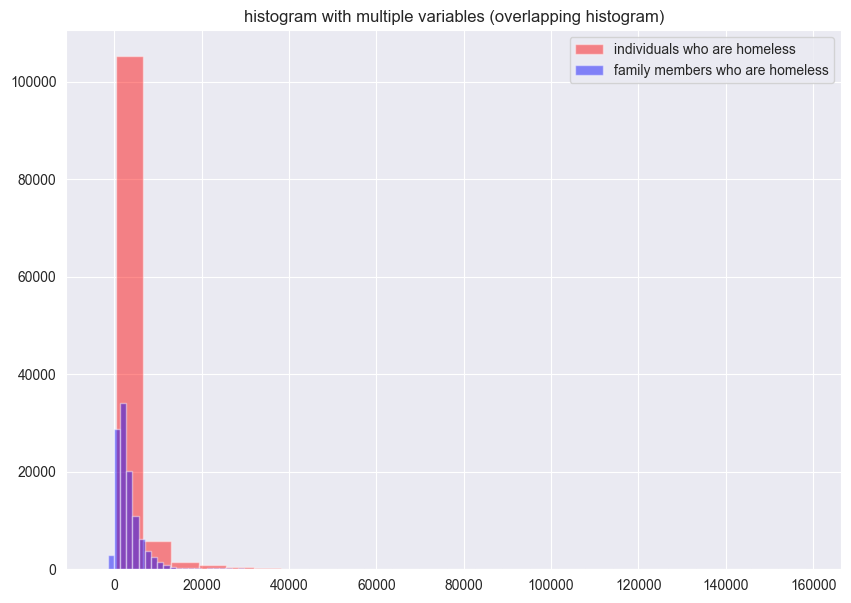

In [103]:
# plotting two histograms on the same axis 
plt.hist(reg_model_diff['Actual value'], bins=25, alpha=0.45, color='red') 
plt.hist(reg_model_diff['Predicted value'], bins=25, alpha=0.45, color='blue') 
plt.title("histogram with multiple variables (overlapping histogram)") 
plt.legend(['individuals who are homeless',  'family members who are homeless']) 
plt.show() 

In [104]:
reg_model_diff.describe()

,Actual value,Predicted value
count,114686.000,114686.000
mean,3323.609,3301.990
std,5308.898,3637.767
min,330.000,-2944.408
25%,1440.173,1208.481
50%,1989.425,2302.457
75%,3181.217,4142.851
max,158351.050,32542.522


In [105]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 1576.9231985761799
Mean Square Error: 14263812.930653576
Root Mean Square Error: 3776.7463418468515
